In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np


In [2]:
# import the covid date csv & clean
covid_df= pd.read_csv('US_COVID-19_Cases_and_Deaths_by_State_over_Time.csv',thousands=',', parse_dates=[0])
covid_df.drop(['consent_cases', 'consent_deaths', 'created_at', 'conf_cases','prob_cases', 'conf_death','pnew_case','prob_death', 'pnew_death'], axis= 1, inplace = True)
covid_df.rename(columns={'submission_date':'Submission Date','state':'State','tot_cases':'Total Cases','new_case':'Daily New Cases','tot_death':'Total Deaths','new_death': 'Daily New Deaths'}, inplace = True)

covid_df.sort_values(['State','Submission Date'])


,Submission Date,State,Total Cases,Daily New Cases,Total Deaths,Daily New Deaths
3599,2020-01-22,AK,0,0,0,0
28030,2020-01-23,AK,0,0,0,0
29871,2020-01-24,AK,0,0,0,0
29941,2020-01-25,AK,0,0,0,0
32257,2020-01-26,AK,0,0,0,0
...,...,...,...,...,...,...
15653,2021-08-23,WY,71562,299,809,0
27695,2021-08-24,WY,72069,507,835,26
24804,2021-08-25,WY,72528,459,835,0
27392,2021-08-26,WY,72995,467,835,0


In [3]:
covid_df.dtypes

Submission Date     datetime64[ns]
State                       object
Total Cases                  int64
Daily New Cases              int64
Total Deaths                 int64
Daily New Deaths             int64
dtype: object

In [75]:
# create groupby date to aggregate data from all state to reflect federal daily data
# reset index so date can be used for plotting
covid_df_grouped_date = covid_df.groupby(['Submission Date']).sum()
covid_df_grouped_date
covid_df_grouped_date.columns = pd.MultiIndex.from_product([["COVID-19"], covid_df_grouped_date.columns])
covid_df_grouped_date.reset_index(level=0, inplace = True)

covid_df_grouped_date

Submission Date    COVID-19                                              
                    Total Cases Daily New Cases Total Deaths Daily New Deaths
0        2020-01-22          33              33            0                0
1        2020-01-23          35               2            0                0
2        2020-01-24          36               1            0                0
3        2020-01-25          39               3            0                0
4        2020-01-26          42               3            0                0
..              ...         ...             ...          ...              ...
579      2021-08-23    38037577          112020       629220              703
580      2021-08-24    38192607          154363       630408             1184
581      2021-08-25    38360956          162485       631563             1138
582      2021-08-26    38531770          170229       632786             1192
583      2021-08-27    38709295          176742       634157             1329

[584 rows x 5 columns]

In [5]:
# use yfinance to pull in stock data for one ticker
SPY_df= yf.download("SPY", group_by='Ticker', start="2020-01-22", end="2021-08-27")


# reset index and rename date column to match covid df
SPY_df.reset_index(inplace=True)
SPY_df.rename(columns={"Date":"Submission Date"},inplace = True)
SPY_df

[*********************100%***********************]  1 of 1 completed


,Submission Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-22,332.239990,332.950012,331.170013,331.339996,323.146667,48914900
1,2020-01-23,330.630005,332.170013,329.410004,331.720001,323.517273,51963000
2,2020-01-24,332.440002,332.529999,327.359985,328.769989,320.640198,87578400
3,2020-01-27,323.029999,325.119995,322.660004,323.500000,315.500580,84062500
4,2020-01-28,325.059998,327.850006,323.600006,326.890015,318.806732,63834000
...,...,...,...,...,...,...,...
399,2021-08-20,440.230011,443.709991,439.709991,443.359985,443.359985,71975900
400,2021-08-23,445.160004,448.230011,443.440002,447.260010,447.260010,54973000
401,2021-08-24,447.970001,448.540009,447.420013,447.970001,447.970001,38744700
402,2021-08-25,448.170013,449.459991,447.769989,448.910004,448.910004,40529700


In [6]:
SPY_df.dtypes

Submission Date    datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Adj Close                 float64
Volume                      int64
dtype: object

In [164]:
# merge dataframes on date, only looking at dates with data for covid and the stock 
complete_df = pd.merge(covid_df_grouped_date, SPY_df, on='Submission Date', how='inner')

C:\Users\dmtib\anaconda3\envs\Python_Requirements_Windows\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [172]:
# display merged dataframe
complete_df

,Submission Date,"(Submission Date, )","(COVID-19, Total Cases)","(COVID-19, Daily New Cases)","(COVID-19, Total Deaths)","(COVID-19, Daily New Deaths)",Open,High,Low,Close,Adj Close,Volume
0,2020-01-22,2020-01-22,33,33,0,0,332.239990,332.950012,331.170013,331.339996,323.146667,48914900
1,2020-01-23,2020-01-23,35,2,0,0,330.630005,332.170013,329.410004,331.720001,323.517273,51963000
2,2020-01-24,2020-01-24,36,1,0,0,332.440002,332.529999,327.359985,328.769989,320.640198,87578400
3,2020-01-27,2020-01-27,43,1,0,0,323.029999,325.119995,322.660004,323.500000,315.500580,84062500
4,2020-01-28,2020-01-28,44,1,0,0,325.059998,327.850006,323.600006,326.890015,318.806732,63834000
...,...,...,...,...,...,...,...,...,...,...,...,...
399,2021-08-20,2021-08-20,37671394,160857,627325,999,440.230011,443.709991,439.709991,443.359985,443.359985,71975900
400,2021-08-23,2021-08-23,38037577,112020,629220,703,445.160004,448.230011,443.440002,447.260010,447.260010,54973000
401,2021-08-24,2021-08-24,38192607,154363,630408,1184,447.970001,448.540009,447.420013,447.970001,447.970001,38744700
402,2021-08-25,2021-08-25,38360956,162485,631563,1138,448.170013,449.459991,447.769989,448.910004,448.910004,40529700


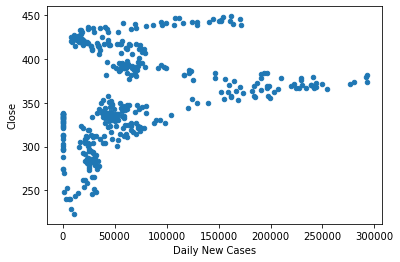

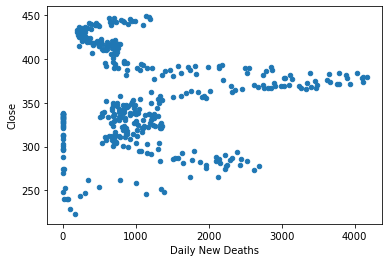

In [18]:
# plot daily covid death total vs stock closing value
complete_df.plot(kind = 'scatter', x='Daily New Cases', y='Close')
complete_df.plot(kind = 'scatter', x='Daily New Deaths', y='Close')

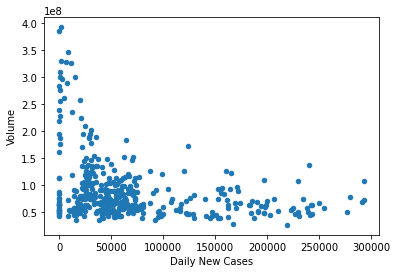

In [19]:
# plot daily covid case total vs stock trading volume for the day

complete_df.plot(kind = 'scatter', x='Daily New Cases', y='Volume')

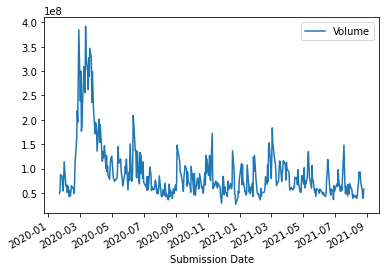

In [20]:
# plot stock trading volume over duration of pandemic

complete_df.plot(kind = 'line', x='Submission Date', y='Volume')

In [161]:
sectors =[ 'SPY','XLF', 'XLU', 'XLK', 'XLE', 'XLI',
             'XLB', 'XLP', 'XLV', 'XLY', 'XLRE', 'XLC']

sectors_df = yf.download(sectors, group_by='Ticker', start="2020-01-22", end="2021-08-27")
sectors_df.reset_index(level=0,inplace=True)
sectors_df.rename(columns={"Date":"Submission Date"},inplace = True)

sectors_df['SPY', 'AMP'] =  sectors_df['SPY', 'High'] -  sectors_df['SPY', 'Low']    

sectors_df

[*********************100%***********************]  12 of 12 completed


Submission Date         XLY                                      \
                           Open        High         Low       Close   
0        2020-01-22  128.070007  128.529999  127.430000  127.540001   
1        2020-01-23  126.889999  127.889999  126.239998  127.730003   
2        2020-01-24  127.980003  128.050003  125.400002  125.949997   
3        2020-01-27  123.230003  124.709999  122.989998  124.070000   
4        2020-01-28  124.669998  125.750000  124.190002  125.279999   
..              ...         ...         ...         ...         ...   
399      2021-08-20  176.210007  177.820007  176.050003  177.619995   
400      2021-08-23  178.570007  180.320007  178.389999  179.910004   
401      2021-08-24  180.669998  181.699997  180.350006  181.179993   
402      2021-08-25  181.179993  182.110001  180.839996  181.880005   
403      2021-08-26  181.259995  181.350006  179.830002  180.199997   

                               XLRE                        ...         XLV  \
      Adj Close   Volume       Open       High        Low  ...       Close   
0    125.739578  3965100  40.099998  40.209999  39.599998  ...  104.730003   
1    125.926888  3995900  39.689999  40.080002  39.590000  ...  104.199997   
2    124.172012  5690900  40.130001  40.205002  39.840000  ...  102.459999   
3    122.318558  7877100  39.750000  39.970001  39.709999  ...  101.680000   
4    123.511467  5907700  39.869999  40.089001  39.770000  ...  102.180000   
..          ...      ...        ...        ...        ...  ...         ...   
399  177.619995  3309200  46.759998  47.237000  46.430000  ...  136.110001   
400  179.910004  3445100  47.139999  47.160000  46.720001  ...  136.160004   
401  181.179993  2895800  46.939999  46.939999  46.349998  ...  135.679993   
402  181.880005  3633300  46.470001  46.654999  46.259998  ...  135.309998   
403  180.199997  3697100  46.470001  46.595001  46.275002  ...  134.779999   

                                 XLU                                   \
      Adj Close    Volume       Open       High        Low      Close   
0    102.194107   9431500  67.500000  67.769997  67.400002  67.580002   
1    101.676949   8522600  67.570000  68.199997  67.500000  68.180000   
2     99.979073  15962700  68.000000  68.610001  67.889999  68.360001   
3     99.217957  11762300  68.320000  68.800003  68.000000  68.190002   
4     99.705856   8079900  68.260002  68.760002  68.089996  68.470001   
..          ...       ...        ...        ...        ...        ...   
399  136.110001   7252700  68.949997  69.980003  68.589996  69.930000   
400  136.160004   8471300  69.879997  69.900002  68.900002  69.029999   
401  135.679993   6548100  69.000000  69.059998  68.120003  68.580002   
402  135.309998   6918500  68.570000  68.930000  68.180000  68.709999   
403  134.779999   5972100  68.709999  68.739998  68.389999  68.540001   

                               SPY  
     Adj Close    Volume       AMP  
0    64.256409  10841600  1.779999  
1    64.826912  12969300  2.760010  
2    64.998055  14401500  5.170013  
3    64.836418  11272200  2.459991  
4    65.102654  17528400  4.250000  
..         ...       ...       ...  
399  69.930000  11790200  4.000000  
400  69.029999  10915400  4.790009  
401  68.580002  12665500  1.119995  
402  68.709999   8164900  1.690002  
403  68.540001   8315900  2.699982  

[404 rows x 74 columns]

In [92]:
complete_df2 = pd.merge(covid_df_grouped_date, sectors_df, on='Submission Date', how='inner')
complete_df2

C:\Users\dmtib\anaconda3\envs\Python_Requirements_Windows\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Submission Date    COVID-19                                                \
                    Total Cases Daily New Cases Total Deaths Daily New Deaths   
0        2020-01-22          33              33            0                0   
1        2020-01-23          35               2            0                0   
2        2020-01-24          36               1            0                0   
3        2020-01-27          43               1            0                0   
4        2020-01-28          44               1            0                0   
..              ...         ...             ...          ...              ...   
399      2021-08-20    37671394          160857       627325              999   
400      2021-08-23    38037577          112020       629220              703   
401      2021-08-24    38192607          154363       630408             1184   
402      2021-08-25    38360956          162485       631563             1138   
403      2021-08-26    38531770          170229       632786             1192   

           XLF                                              ...         XLI  \
          Open       High        Low      Close  Adj Close  ...         Low   
0    30.870001  30.940001  30.820000  30.860001  29.828012  ...   82.980003   
1    30.700001  30.850000  30.490000  30.780001  29.750689  ...   82.629997   
2    30.790001  30.790001  30.200001  30.389999  29.373730  ...   82.930000   
3    29.790001  30.059999  29.750000  29.920000  28.919445  ...   81.970001   
4    30.080000  30.400000  30.030001  30.270000  29.257746  ...   81.860001   
..         ...        ...        ...        ...        ...  ...         ...   
399  37.459999  37.750000  37.320000  37.689999  37.689999  ...  102.139999   
400  37.880001  38.160000  37.880001  38.000000  38.000000  ...  103.059998   
401  38.070000  38.320000  38.040001  38.230000  38.230000  ...  103.650002   
402  38.330002  38.919998  38.250000  38.680000  38.680000  ...  103.750000   
403  38.849998  38.900002  38.450001  38.490002  38.490002  ...  103.989998   

                                              XLV                          \
          Close   Adj Close    Volume        Open        High         Low   
0     83.040001   80.876297   7490500  104.830002  105.080002  104.589996   
1     83.940002   81.752853  10758500  104.550003  104.699997  103.480003   
2     83.550003   81.373016  13402200  104.320000  104.370003  102.199997   
3     81.970001   79.834190  15013800  101.220001  102.070000  101.080002   
4     82.500000   80.350365  14918000  101.980003  102.580002  101.699997   
..          ...         ...       ...         ...         ...         ...   
399  102.629997  102.629997  11752300  135.470001  136.520004  135.000000   
400  103.470001  103.470001   8471000  136.880005  136.979996  136.119995   
401  103.989998  103.989998   7593200  136.160004  136.179993  135.289993   
402  104.660004  104.660004   9404200  135.550003  135.619995  134.750000   
403  104.199997  104.199997   9951100  135.389999  135.690002  134.520004   

                                       
          Close   Adj Close    Volume  
0    104.730003  102.194107   9431500  
1    104.199997  101.676949   8522600  
2    102.459999   99.979073  15962700  
3    101.680000   99.217957  11762300  
4    102.180000   99.705856   8079900  
..          ...         ...       ...  
399  136.110001  136.110001   7252700  
400  136.160004  136.160004   8471300  
401  135.679993  135.679993   6548100  
402  135.309998  135.309998   6918500  
403  134.779999  134.779999   5972100  

[404 rows x 77 columns]

In [83]:
print(complete_df2['XLF']['Open'])
print(complete_df2['Submission Date'])

0      30.870001
1      30.700001
2      30.790001
3      29.790001
4      30.080000
         ...    
399    37.459999
400    37.880001
401    38.070000
402    38.330002
403    38.849998
Name: Open, Length: 404, dtype: float64
0     2020-01-22
1     2020-01-23
2     2020-01-24
3     2020-01-27
4     2020-01-28
         ...    
399   2021-08-20
400   2021-08-23
401   2021-08-24
402   2021-08-25
403   2021-08-26
Name: Submission Date, Length: 404, dtype: datetime64[ns]


In [177]:
plt.figure()
plt.plot(complete_df2['Submission Date'], complete_df2[['SPY','Close']])
plt.plot(complete_df2['Submission Date'], complete_df2[['COVID-19','Daily New Cases']])


complete_df2.plot(kind = 'scatter', x=('COVID-19','Daily New Cases'), y=('SPY','Volume'))

KeyError: "['Close'] not in index"

<Figure size 432x288 with 0 Axes>